## Sentiment Analysis on Stock market tweets 


Dataset source :https://github.com/nunomroliveira/stock_market_sentiment

In [1370]:
# Import spaCy and load the language library. Remember to use a larger model!

import spacy
nlp =spacy.load('en_core_web_lg')

In [1371]:


import numpy as np
import pandas as pd

import nltk
import re
import string

In [1372]:
stock =pd.read_csv("stock_tweets.csv" ,encoding='unicode_escape',error_bad_lines=False)
stock

,created_at,text,sentiment
0,2013-01-01 20:10:04,Kickers on my watchlist $XIDE $TRIT $SOQ $PNK ...,positive
1,2013-01-01 20:33:37,"""@user: $AAPL MOVIE. 55% return for the FEAR/G...",positive
2,2013-01-01 21:43:41,@user I'd be afraid to short $AMZN - they are ...,positive
3,2013-01-02 01:49:48,$MNTA Over $12.00 URL,positive
4,2013-01-02 01:51:33,$OI Over $21.37 URL,positive
...,...,...,...
4995,2013-03-31 21:35:26,"If $AAPL goes to over $451, I will go short. S...",negative
4996,2013-03-31 21:37:55,$MMM looks ready to break out. Looking to go l...,positive
4997,2013-03-31 22:54:02,$AMZN - Closed over volume support inside of t...,positive
4998,2013-03-31 23:22:15,$BBT coiled up after finding support at 50/200...,positive


In [1373]:
stock['sentiment'].value_counts()

positive    3350
negative    1650
Name: sentiment, dtype: int64

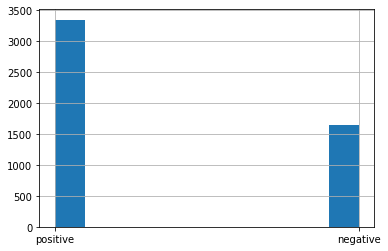

In [1374]:
stock['sentiment'].hist()

We can see that negative class is almost 50 percent of postive class hence we shall not proceed with class balancing

# Data cleaning on text data

In [1375]:
# check for null values
stock.isna().sum()

created_at    0
text          0
sentiment     0
dtype: int64

In [1376]:
# define a function to clean the text data
# use re. sub() function which is used to replace occurrences of a particular sub-string with another sub-string.

def text_cleaning(text):
    text =text.lower()                     # make in lower case
    text = re.sub('\[.*?@\]','',text)      # remove text in square brackets
    text =re.sub('\n' ,'',text)
    text = re.sub('\w*\d\w*','' ,text)      # remove words containing numbers
    text.lstrip("$")                        # removes $ sign from start of string   
    text.strip()
    text =re.sub('[!@#$]','',text)          # replace given characters from string
    return text
    

In [1377]:
stock['text'] = stock['text'].apply( lambda x:text_cleaning(x))

In [1378]:
stock

,created_at,text,sentiment
0,2013-01-01 20:10:04,kickers on my watchlist xide trit soq pnk cpwr...,positive
1,2013-01-01 20:33:37,"""user: aapl movie. % return for the fear/greed...",positive
2,2013-01-01 21:43:41,user i'd be afraid to short amzn - they are lo...,positive
3,2013-01-02 01:49:48,mnta over . url,positive
4,2013-01-02 01:51:33,oi over . url,positive
...,...,...,...
4995,2013-03-31 21:35:26,"if aapl goes to over , i will go short. still ...",negative
4996,2013-03-31 21:37:55,mmm looks ready to break out. looking to go lo...,positive
4997,2013-03-31 22:54:02,amzn - closed over volume support inside of th...,positive
4998,2013-03-31 23:22:15,bbt coiled up after finding support at / sma's...,positive


# MODELLING

## 1.  Perform VADER (valence aware dictionary for sentiment reasoning) model for Sentiment Analysis on stock price twitter reviews

VADER is a model that is used for sentiment analysis and is sensitive to polarity (positive /negative).
It maps the lexical features to emotional intensities called sentiment scores.

In [1379]:
# Import SentimentIntensityAnalyzer and create an sid object

from nltk.sentiment.vader import SentimentIntensityAnalyzer

sid=SentimentIntensityAnalyzer()


In [1380]:
# find any one review and check its score


review1 = stock.iloc[2]['sentiment']
review1

'positive'

# We will now  calculate scores and compound scores for entire dataset by creating seperate columns and will compare our predictions with the given results

In [1381]:
# create column for adding sentiment scores 

stock['scores']= stock['sentiment'].apply(lambda review:sid.polarity_scores(review))


In [1382]:
# create a column for adding compound scores 

stock['compound_score']=stock['scores'].apply(lambda dic:dic['compound'])


In [1383]:
# create condition on compound score to predict sentiment

stock['predicted_sentiment'] =stock['compound_score'].apply(lambda x :'Positive' if x>=0 else 'Negative')

In [1384]:
stock

,created_at,text,sentiment,scores,compound_score,predicted_sentiment
0,2013-01-01 20:10:04,kickers on my watchlist xide trit soq pnk cpwr...,positive,"{'neg': 0.0, 'neu': 0.0, 'pos': 1.0, 'compound...",0.5574,Positive
1,2013-01-01 20:33:37,"""user: aapl movie. % return for the fear/greed...",positive,"{'neg': 0.0, 'neu': 0.0, 'pos': 1.0, 'compound...",0.5574,Positive
2,2013-01-01 21:43:41,user i'd be afraid to short amzn - they are lo...,positive,"{'neg': 0.0, 'neu': 0.0, 'pos': 1.0, 'compound...",0.5574,Positive
3,2013-01-02 01:49:48,mnta over . url,positive,"{'neg': 0.0, 'neu': 0.0, 'pos': 1.0, 'compound...",0.5574,Positive
4,2013-01-02 01:51:33,oi over . url,positive,"{'neg': 0.0, 'neu': 0.0, 'pos': 1.0, 'compound...",0.5574,Positive
...,...,...,...,...,...,...
4995,2013-03-31 21:35:26,"if aapl goes to over , i will go short. still ...",negative,"{'neg': 1.0, 'neu': 0.0, 'pos': 0.0, 'compound...",-0.5719,Negative
4996,2013-03-31 21:37:55,mmm looks ready to break out. looking to go lo...,positive,"{'neg': 0.0, 'neu': 0.0, 'pos': 1.0, 'compound...",0.5574,Positive
4997,2013-03-31 22:54:02,amzn - closed over volume support inside of th...,positive,"{'neg': 0.0, 'neu': 0.0, 'pos': 1.0, 'compound...",0.5574,Positive
4998,2013-03-31 23:22:15,bbt coiled up after finding support at / sma's...,positive,"{'neg': 0.0, 'neu': 0.0, 'pos': 1.0, 'compound...",0.5574,Positive


In [1385]:
from sklearn.metrics import accuracy_score, classification_report ,confusion_matrix

In [1386]:
# compare given label with our predicted sentiment value

print(accuracy_score(brexit['label'] ,brexit['predicted_sentiment']))

0.4035


In [1387]:
accuracy1 =accuracy_score(brexit['label'] ,brexit['predicted_sentiment'])


In [1388]:
print(classification_report(brexit['label'] ,brexit['predicted_sentiment']))

              precision    recall  f1-score   support

    Negative       1.00      0.40      0.57      1990
    Positive       0.01      1.00      0.02        10

    accuracy                           0.40      2000
   macro avg       0.50      0.70      0.29      2000
weighted avg       1.00      0.40      0.57      2000



In [1389]:
print(confusion_matrix(brexit['label'] ,brexit['predicted_sentiment']))

[[ 797 1193]
 [   0   10]]


# 2. Using different machine language algorithm we will try to predict sentiments 

In [1390]:
from sklearn.model_selection import train_test_split


In [1391]:
x=stock['text']
y=stock['sentiment']

In [1392]:
x_train ,x_test ,y_train,y_test =train_test_split(x,y,test_size=0.25 ,random_state=40 )

# 2.a)  Use linear support vector machine along with pipeline

The TfidfVectorizer will tokenize documents, learn the vocabulary and inverse document frequency weightings(Inverse Document Frequency (IDF) is a weight indicating how commonly a word is used.The more frequent its usage across documents, the lower its score), and allow you to encode new documents.

In [1393]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score,classification_report

In [1394]:
pipeline = Pipeline([('Tfidf',TfidfVectorizer()),
                   ('Svm',LinearSVC())])

pipeline

Pipeline(steps=[('Tfidf', TfidfVectorizer()), ('Svm', LinearSVC())])

In [1395]:
pipeline.fit(x_train,y_train)

Pipeline(steps=[('Tfidf', TfidfVectorizer()), ('Svm', LinearSVC())])

In [1396]:
predict1 =pipeline.predict(x_test)


In [1397]:
print(accuracy_score(y_test,predict1))

0.7992


In [1398]:
accuracy2 =accuracy_score(y_test,predict1)

In [1399]:
print(classification_report(y_test,predict1))

              precision    recall  f1-score   support

    negative       0.76      0.59      0.67       421
    positive       0.81      0.90      0.86       829

    accuracy                           0.80      1250
   macro avg       0.79      0.75      0.76      1250
weighted avg       0.80      0.80      0.79      1250



# 2.b) Using Logistic regression and vectorization

In [1400]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression

In [1401]:
pipeline = Pipeline([('Tfidf',TfidfVectorizer()),
                   ('logisticregression',LogisticRegression(penalty ='l2',solver ='saga'))])

pipeline

Pipeline(steps=[('Tfidf', TfidfVectorizer()),
                ('logisticregression', LogisticRegression(solver='saga'))])

In [1402]:
pipeline.fit(x_train,y_train)

Pipeline(steps=[('Tfidf', TfidfVectorizer()),
                ('logisticregression', LogisticRegression(solver='saga'))])

In [1403]:
predict2 =pipeline.predict(x_test)
predict2

array(['positive', 'positive', 'positive', ..., 'positive', 'positive',
       'positive'], dtype=object)

In [1404]:
print(accuracy_score(y_test,predict2))

0.7792


In [1405]:
accuracy3 =accuracy_score(y_test,predict2)

In [1406]:
print(classification_report(y_test,predict2))

              precision    recall  f1-score   support

    negative       0.83      0.44      0.57       421
    positive       0.77      0.95      0.85       829

    accuracy                           0.78      1250
   macro avg       0.80      0.70      0.71      1250
weighted avg       0.79      0.78      0.76      1250



# 2.c) Using Naive Bayes and vectorization

In [1407]:
from sklearn.naive_bayes import MultinomialNB

In [1408]:
pipeline = Pipeline([('Tfidf',TfidfVectorizer()),
                   ('naivebayes',MultinomialNB(alpha=1.0, fit_prior=True, class_prior=None))])

pipeline

Pipeline(steps=[('Tfidf', TfidfVectorizer()), ('naivebayes', MultinomialNB())])

In [1409]:
pipeline.fit(x_train,y_train)

Pipeline(steps=[('Tfidf', TfidfVectorizer()), ('naivebayes', MultinomialNB())])

In [1410]:
predict3 =pipeline.predict(x_test)
predict3

array(['positive', 'positive', 'positive', ..., 'positive', 'positive',
       'positive'], dtype='<U8')

In [1411]:
print(accuracy_score(y_test,predict3))

0.728


In [1412]:
accuracy4= accuracy_score(y_test,predict3)

In [1413]:
print(classification_report(y_test,predict3))

              precision    recall  f1-score   support

    negative       0.94      0.21      0.34       421
    positive       0.71      0.99      0.83       829

    accuracy                           0.73      1250
   macro avg       0.82      0.60      0.58      1250
weighted avg       0.79      0.73      0.66      1250



# 2.d) Using Stochastic Gradiant Descent and vectorization

In [1414]:
from sklearn.linear_model import SGDClassifier


In [1415]:
pipeline = Pipeline([('Tfidf',TfidfVectorizer()),
                   ('SGD',SGDClassifier(loss = 'hinge', penalty = 'l2', random_state=0))])

pipeline

Pipeline(steps=[('Tfidf', TfidfVectorizer()),
                ('SGD', SGDClassifier(random_state=0))])

In [1416]:
pipeline.fit(x_train,y_train)

Pipeline(steps=[('Tfidf', TfidfVectorizer()),
                ('SGD', SGDClassifier(random_state=0))])

In [1417]:
predict4 =pipeline.predict(x_test)
predict4

array(['positive', 'positive', 'positive', ..., 'positive', 'negative',
       'positive'], dtype='<U8')

In [1418]:
print(accuracy_score(y_test,predict4))

0.7936


In [1419]:
accuracy5= accuracy_score(y_test,predict4)

In [1420]:
print(classification_report(y_test,predict4))

              precision    recall  f1-score   support

    negative       0.73      0.61      0.66       421
    positive       0.82      0.89      0.85       829

    accuracy                           0.79      1250
   macro avg       0.78      0.75      0.76      1250
weighted avg       0.79      0.79      0.79      1250



# 2.e) Using Random Forest classifier and vectorization

In [1421]:
from sklearn.ensemble import RandomForestClassifier

In [1422]:
pipeline = Pipeline([('Tfidf',TfidfVectorizer()),
                   ('RFC',RandomForestClassifier(n_estimators=100, criterion='gini', max_depth=None,min_samples_split=4))])

pipeline

Pipeline(steps=[('Tfidf', TfidfVectorizer()),
                ('RFC', RandomForestClassifier(min_samples_split=4))])

In [1423]:
pipeline.fit(x_train,y_train)

Pipeline(steps=[('Tfidf', TfidfVectorizer()),
                ('RFC', RandomForestClassifier(min_samples_split=4))])

In [1424]:
predict5 =pipeline.predict(x_test)
predict5

array(['positive', 'positive', 'positive', ..., 'positive', 'negative',
       'positive'], dtype=object)

In [1425]:
print(accuracy_score(y_test,predict5))

0.8056


In [1426]:
accuracy6= accuracy_score(y_test,predict5)

In [1427]:
print(classification_report(y_test,predict5))

              precision    recall  f1-score   support

    negative       0.82      0.54      0.65       421
    positive       0.80      0.94      0.87       829

    accuracy                           0.81      1250
   macro avg       0.81      0.74      0.76      1250
weighted avg       0.81      0.81      0.79      1250



# Compare performances of all models

In [1428]:
all_accuracies =[accuracy1 ,accuracy2,accuracy3 ,accuracy4,accuracy5,accuracy6]
models =['VADER','LinearSVM','Logistic Regression','Naive Bayes','SGD classifier','RandomForestClassifier']

df =pd.DataFrame( {'Model':models ,'Accuracy': all_accuracies })
df

,Model,Accuracy
0,VADER,0.4035
1,LinearSVM,0.7992
2,Logistic Regression,0.7792
3,Naive Bayes,0.7280
4,SGD classifier,0.7936
5,RandomForestClassifier,0.8056


We can see RandomForest Classifier gives teh best result although SVM and SGD also gives nearly same results.